# Analysis for superstore dataset 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
file_path = 'Sample - Superstore.xls'
df = pd.read_excel(file_path)

In [6]:
print("Dataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  

In [7]:
#checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [8]:
#descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
            Row ID                     Order Date   
count  9994.000000                           9994  \
mean   4997.500000  2016-04-30 00:07:12.259355648   
min       1.000000            2014-01-03 00:00:00   
25%    2499.250000            2015-05-23 00:00:00   
50%    4997.500000            2016-06-26 00:00:00   
75%    7495.750000            2017-05-14 00:00:00   
max    9994.000000            2017-12-30 00:00:00   
std    2885.163629                            NaN   

                           Ship Date   Postal Code         Sales     Quantity   
count                           9994   9994.000000   9994.000000  9994.000000  \
mean   2016-05-03 23:06:58.571142912  55190.379428    229.858001     3.789574   
min              2014-01-07 00:00:00   1040.000000      0.444000     1.000000   
25%              2015-05-27 00:00:00  23223.000000     17.280000     2.000000   
50%              2016-06-29 00:00:00  56430.500000     54.490000     3.000000   
75%        

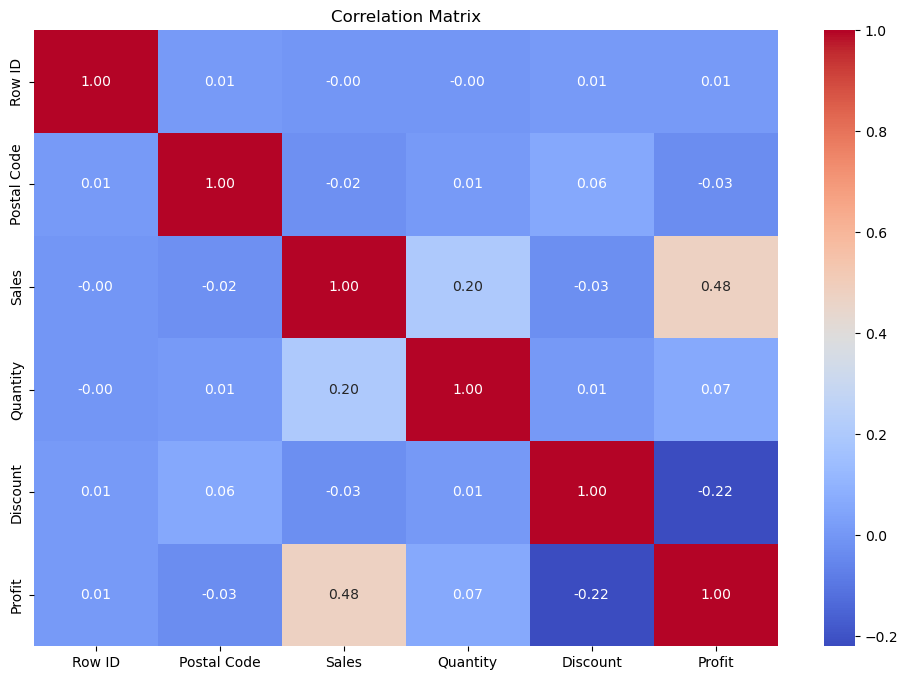

In [16]:
# Correlation matrix with only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
#red shows strong positive correlation,white shos no correlation,
#0.7 to 1.0 (or -0.7 to -1.0): Strong correlation
#0.5 to 0.7 (or -0.5 to -0.7): Moderate correlation
#0.3 to 0.5 (or -0.3 to -0.5): Weak correlation
#0.0 to 0.3 (or 0.0 to -0.3): Very weak or no correlation

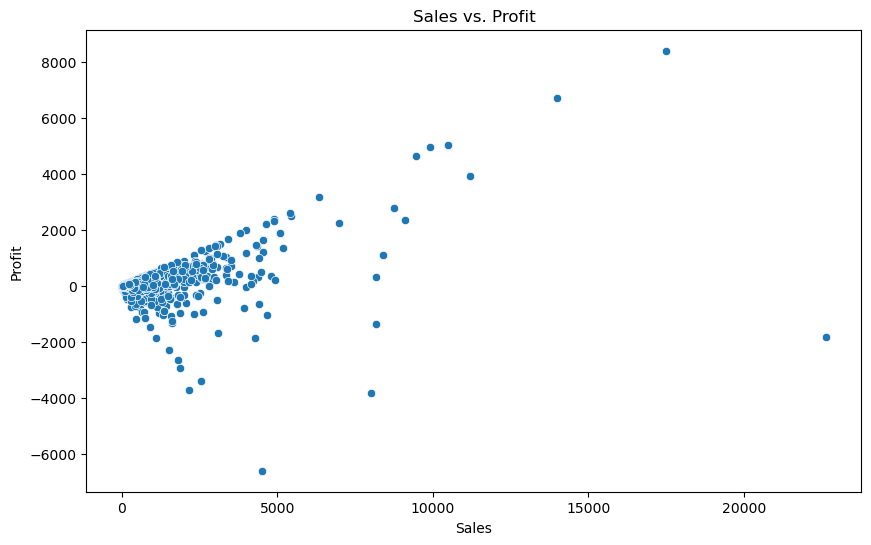

In [10]:
#scatter plot of Sales vs. Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

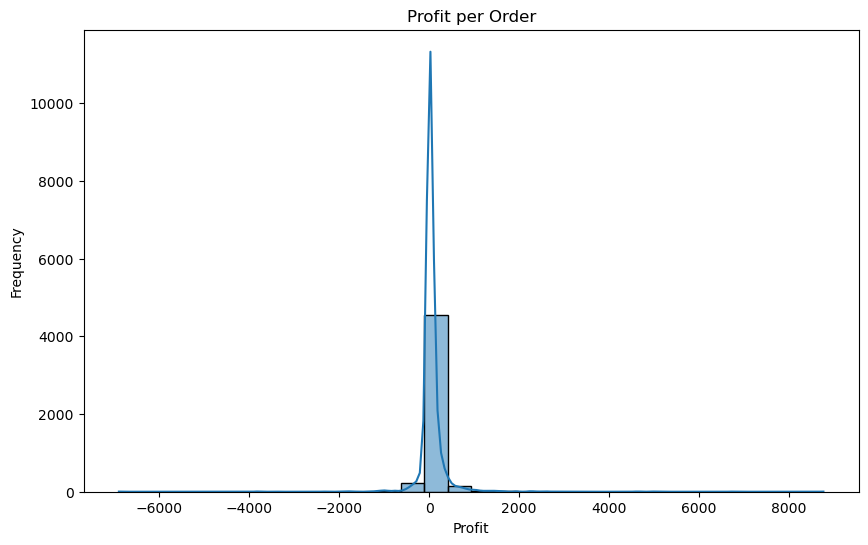

In [12]:
# Profit per Order
df['Order ID'] = df['Order ID'].astype('category')
order_profit = df.groupby('Order ID')['Profit'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.histplot(order_profit['Profit'], bins=30, kde=True)
plt.title('Profit per Order')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

In [17]:
from pandas_profiling import ProfileReport

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8624\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [18]:
file_path = 'Sample - Superstore.xls'
df = pd.read_excel(file_path)

In [19]:
profile = ProfileReport(df, title='Superstore Dataset Profiling Report', explorative=True)

In [20]:
profile.to_file("superstore_profiling_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]